In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

from nltk.tokenize import word_tokenize

In [18]:
df = pd.read_csv('data/combined/filtered_combined.csv',index_col=0)

In [20]:
min_five_posters = list(pd.Series(df.groupby('annotator').size()).mask(lambda x: x < 5).dropna().index)
df = df[df['annotator'].isin(min_five_posters)]

In [22]:
df['radical'] = [1 if ((x ==1) or (x==5)) else -1 if ((x==2) or (x==4)) else 0 for x in df.label]

In [45]:
df = df.join(df.groupby('annotator')['radical'].mean(), on= 'annotator', rsuffix='_mean')

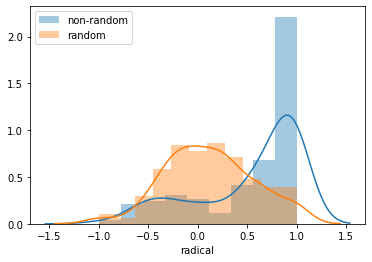

In [41]:
sns.distplot(df[df['random']==1].groupby('annotator')['radical'].mean())
sns.distplot(df[df['random']==0].groupby('annotator')['radical'].mean())
plt.legend(['non-random','random'])

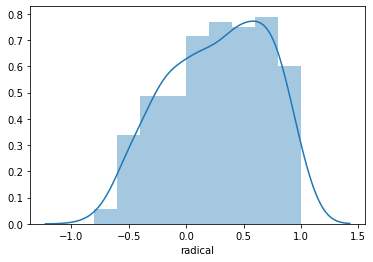

In [42]:
sns.distplot(df.groupby('annotator')['radical'].mean())


In [47]:
df = df.join(df[df['random']==1].groupby('annotator')['radical'].mean(),on = 'annotator', rsuffix = '_random')
df = df.join(df[df['random']==0].groupby('annotator')['radical'].mean(),on = 'annotator', rsuffix = '_non_random')

In [58]:
radical_stats = df.groupby('annotator')['radical'].mean().describe(percentiles = [.2,.4,.6,.8])
radical_stats['mean']+radical_stats['std']

0.7084982052100237

In [63]:
df['is_radical'] = df.radical_mean.apply(lambda x: (x>radical_stats['mean']+radical_stats['std']))
df['is_centralist'] = df.radical_mean.apply(lambda x: (x<radical_stats['mean']-radical_stats['std']))


In [66]:
df.to_csv('data/combined/filtered_combined.csv')